In [51]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import r2_score

Read Dataset

In [52]:
data = pd.read_csv('Sales Prediction.csv')

In [53]:
print(data.head(10))

     TV      Radio  Social Media Influencer       Sales
0  16.0   6.566231      2.907983       Mega   54.732757
1  13.0   9.237765      2.409567       Mega   46.677897
2  41.0  15.886446      2.913410       Mega  150.177829
3  83.0  30.020028      6.922304       Mega  298.246340
4  15.0   8.437408      1.405998      Micro   56.594181
5  29.0   9.614382      1.027163       Mega  105.889148
6  55.0  24.893811      4.273602      Micro  198.679825
7  31.0  17.355042      2.289855       Nano  108.733932
8  76.0  24.648898      7.130116      Macro  270.189400
9  13.0   0.431128      2.229423       Mega   48.280582


In [54]:
print(data.info)

<bound method DataFrame.info of         TV      Radio  Social Media Influencer       Sales
0     16.0   6.566231      2.907983       Mega   54.732757
1     13.0   9.237765      2.409567       Mega   46.677897
2     41.0  15.886446      2.913410       Mega  150.177829
3     83.0  30.020028      6.922304       Mega  298.246340
4     15.0   8.437408      1.405998      Micro   56.594181
...    ...        ...           ...        ...         ...
4567  26.0   4.472360      0.717090      Micro   94.685866
4568  71.0  20.610685      6.545573       Nano  249.101915
4569  44.0  19.800072      5.096192      Micro  163.631457
4570  71.0  17.534640      1.940873      Macro  253.610411
4571  42.0  15.966688      5.046548      Micro  148.202414

[4572 rows x 5 columns]>


Checking Null values

In [55]:

data.isnull().sum()*100/data.shape[0]

TV              0.218723
Radio           0.087489
Social Media    0.131234
Influencer      0.000000
Sales           0.131234
dtype: float64

In [56]:
#drop rows with missing values
data = data.dropna()

In [57]:
#convert values of Influencer feature into values
data['Influencer']=data['Influencer'].replace({'Mega':4,'Micro':1,'Macro':3,'Nano':2})

In [58]:
data.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,4,54.732757
1,13.0,9.237765,2.409567,4,46.677897
2,41.0,15.886446,2.913410,4,150.177829
3,83.0,30.020028,6.922304,4,298.246340
4,15.0,8.437408,1.405998,1,56.594181
5,29.0,9.614382,1.027163,4,105.889148
6,55.0,24.893811,4.273602,1,198.679825
7,31.0,17.355042,2.289855,2,108.733932
8,76.0,24.648898,7.130116,3,270.189400
9,13.0,0.431128,2.229423,4,48.280582


In [59]:
data.isnull().sum()*100/data.shape[0] #now data without missing values

TV              0.0
Radio           0.0
Social Media    0.0
Influencer      0.0
Sales           0.0
dtype: float64

In [60]:
print(data.describe())

                TV        Radio  Social Media   Influencer        Sales
count  4546.000000  4546.000000   4546.000000  4546.000000  4546.000000
mean     54.062912    18.157533      3.323473     2.498900   192.413332
std      26.104942     9.663260      2.211254     1.123457    93.019873
min      10.000000     0.000684      0.000031     1.000000    31.199409
25%      32.000000    10.555355      1.530822     1.000000   112.434612
50%      53.000000    17.859513      3.055565     2.000000   188.963678
75%      77.000000    25.640603      4.804919     4.000000   272.324236
max     100.000000    48.871161     13.981662     4.000000   364.079751


In [61]:
print(data.shape)

(4546, 5)


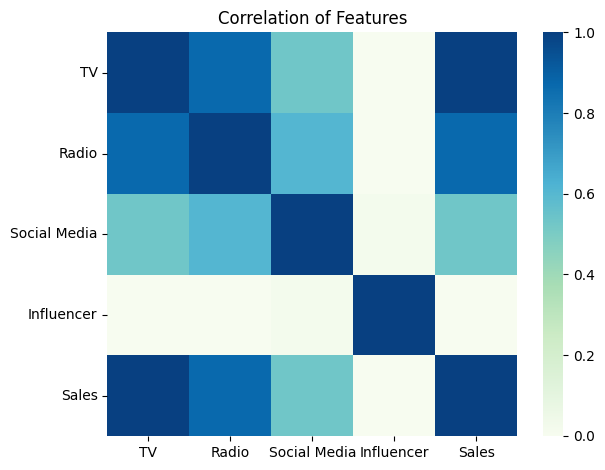

In [62]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap='GnBu')
plt.title('Correlation of Features')
plt.tight_layout()

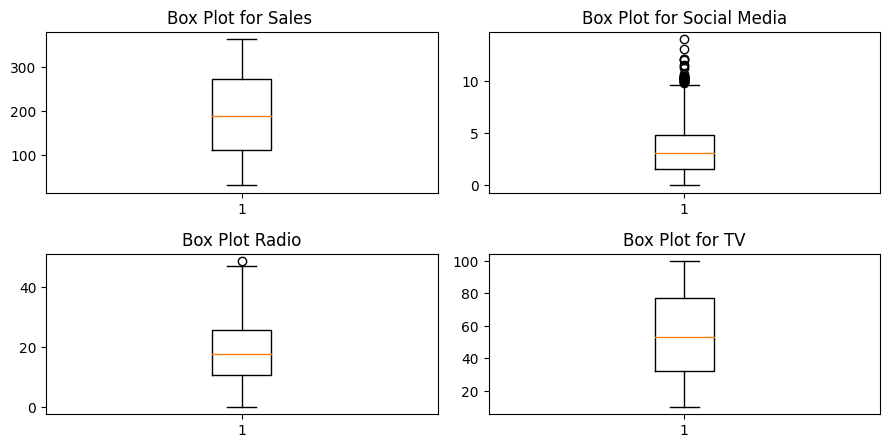

In [63]:
fig = plt.figure(figsize=(9,11))
ax1 = fig.add_subplot(5,2,1)
ax1.boxplot(data['Sales'])
ax1.set_title('Box Plot for Sales ')

ax2 = fig.add_subplot(5,2,2)
ax2.boxplot(data['Social Media'])
ax2.set_title('Box Plot for Social Media')

ax3 = fig.add_subplot(5,2,3)
ax3.boxplot(data['Radio'])
ax3.set_title('Box Plot Radio')

ax4 = fig.add_subplot(5,2,4)
ax4.boxplot(data['TV'])
ax4.set_title('Box Plot for TV')

plt.tight_layout()
plt.show()

Remove Outliers From Dataset

In [64]:
#remove outliers from dataset
# outlier treatment for dataset
#Q1 is the 25% and Q3 is 75% of data, Q2 is 50% of data

Q1 = data['Radio'].quantile(0.25)
Q3 = data['Radio'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Radio'] >= Q1 - 1.5*IQR) & (data['Radio'] <= Q3 + 1.5*IQR)] # drop rows that include outliers

Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Sales'] >= Q1 - 1.5*IQR) & (data['Sales'] <= Q3 + 1.5*IQR)] # drop rows that include outliers

Q1 = data['Social Media'].quantile(0.25)
Q3 = data['Social Media'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Social Media'] >= Q1 - 1.5*IQR) & (data['Social Media'] <= Q3 + 1.5*IQR)] # drop rows that include outliers

In [65]:
data.shape

(4517, 5)

Visualization

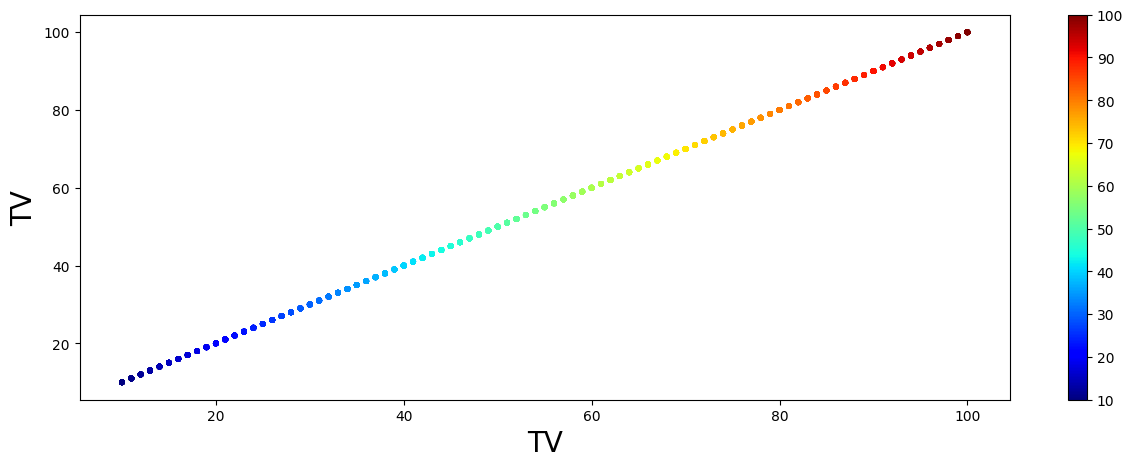

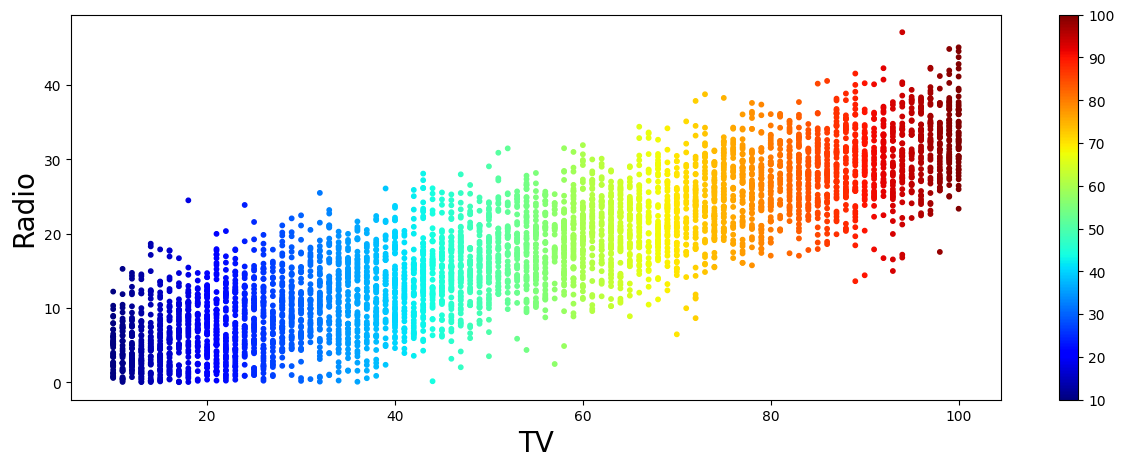

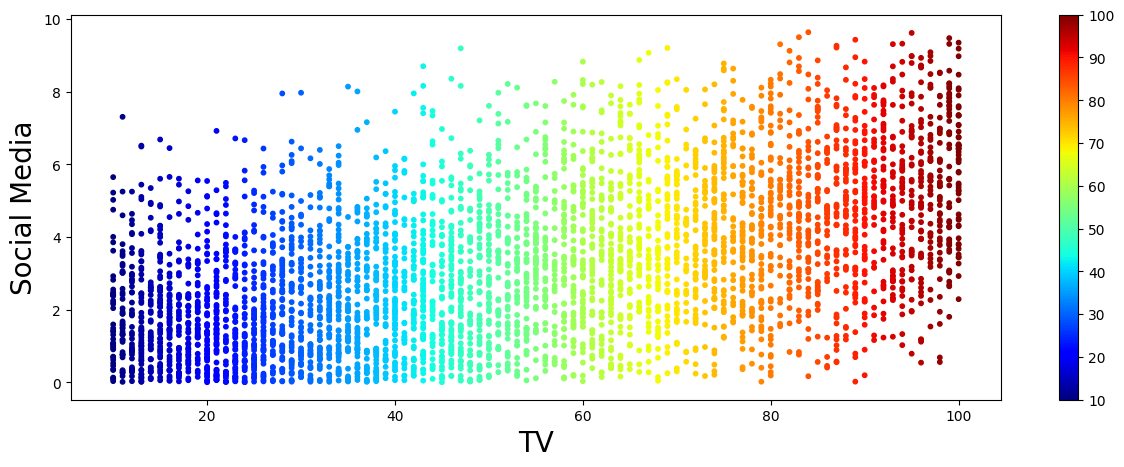

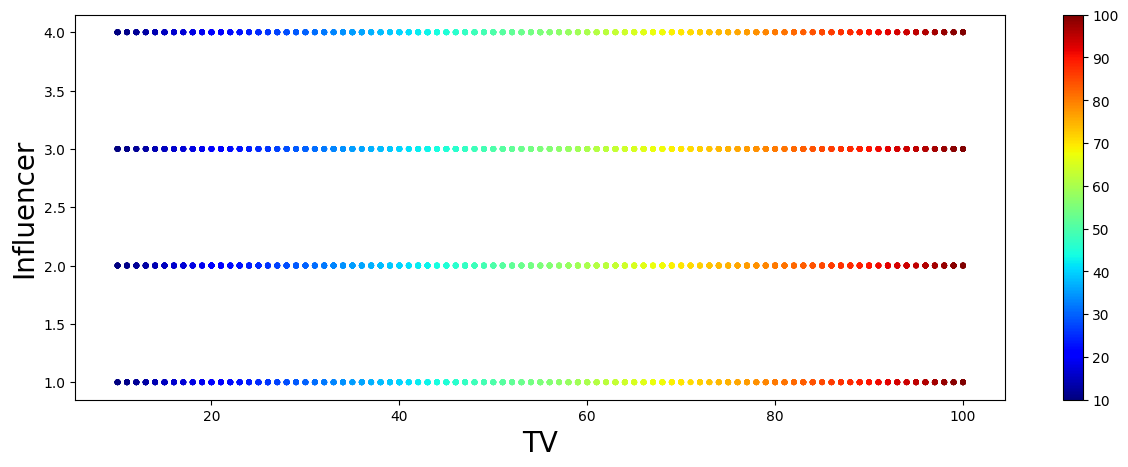

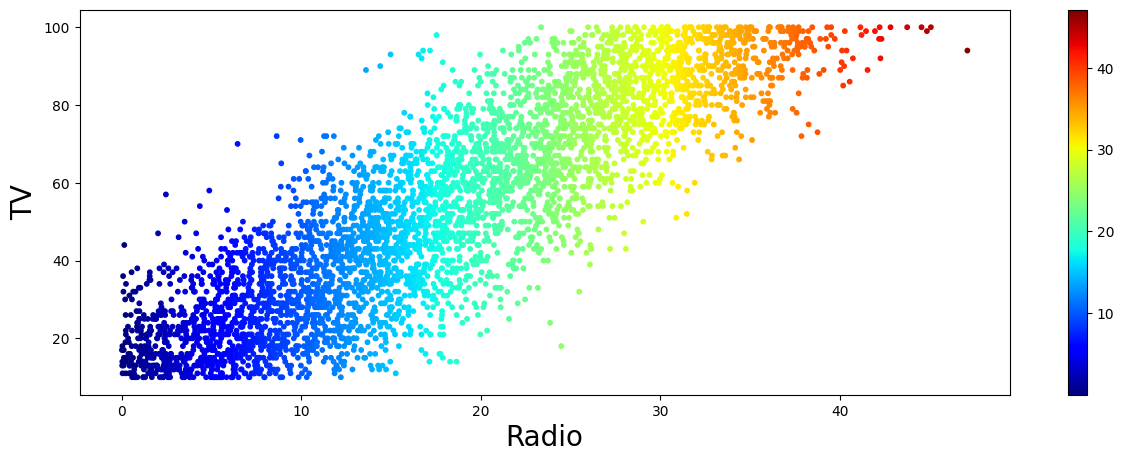

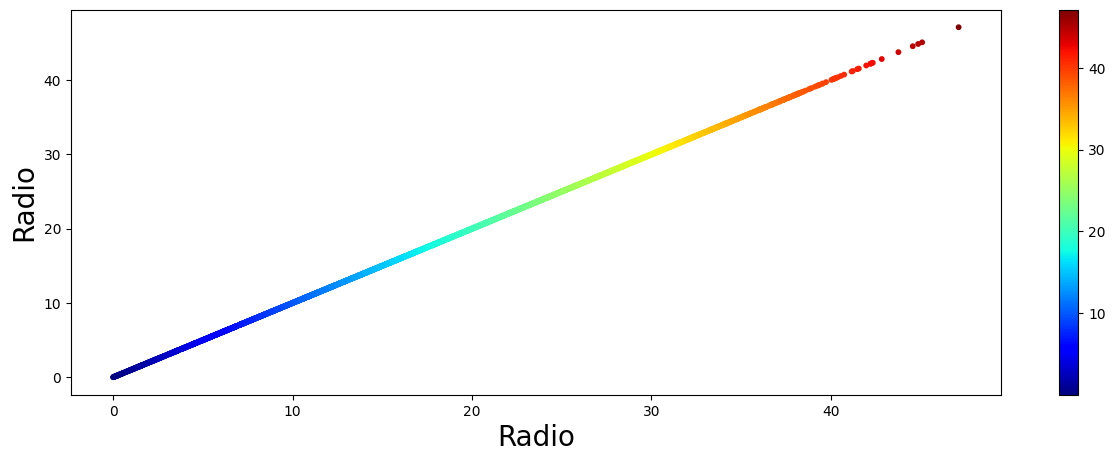

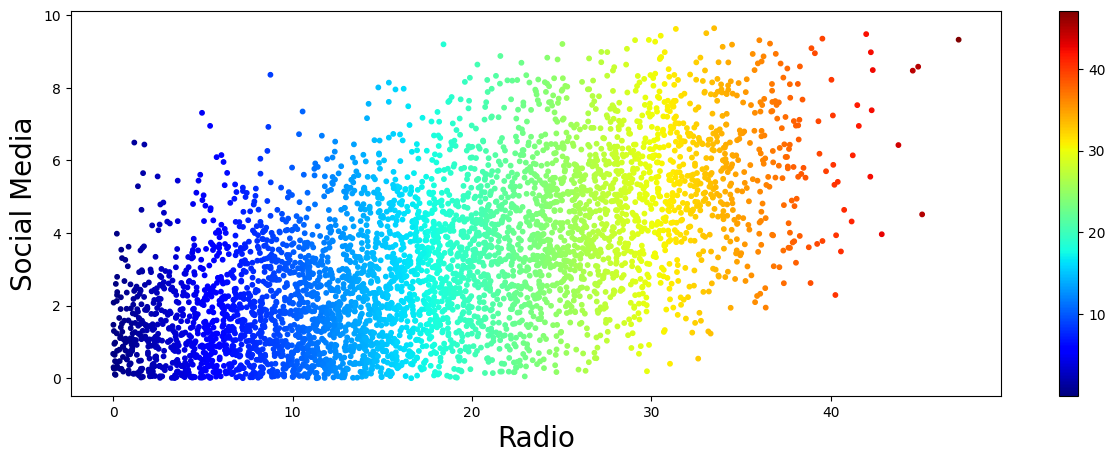

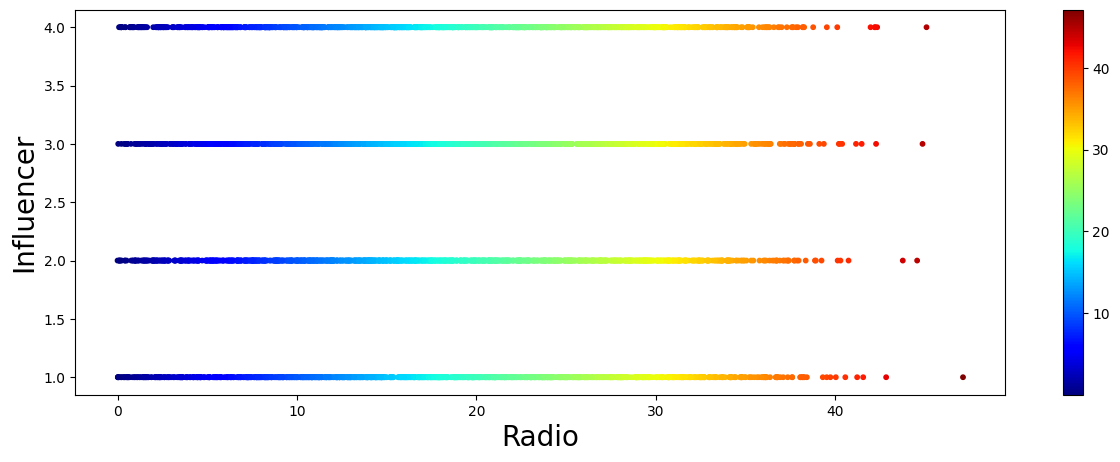

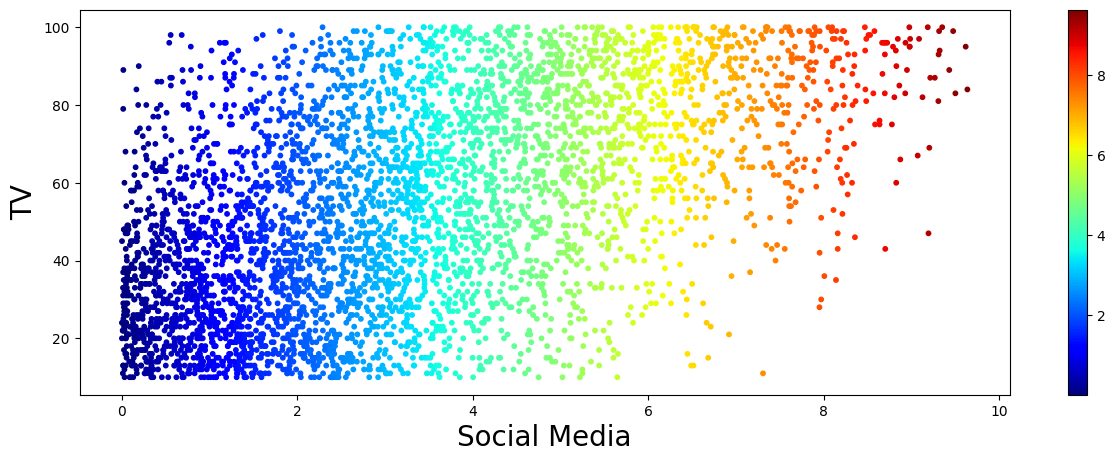

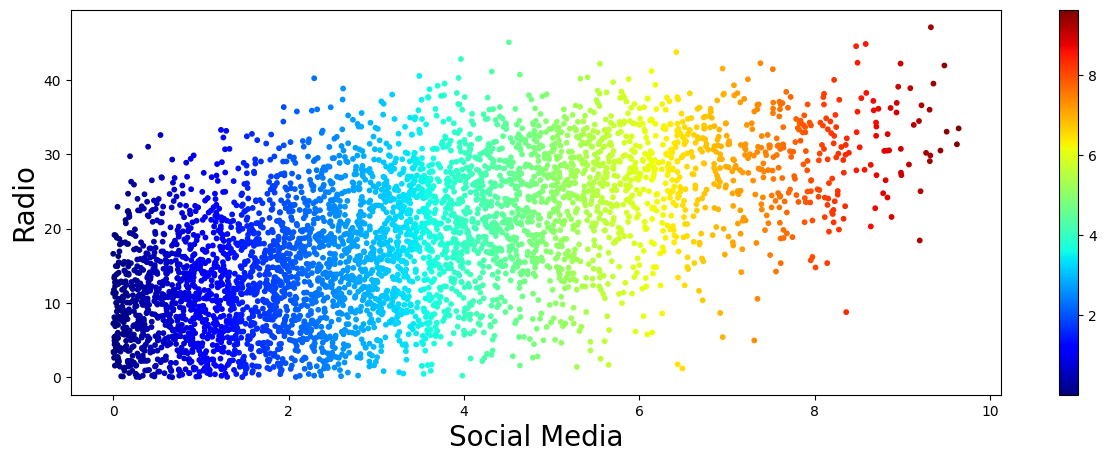

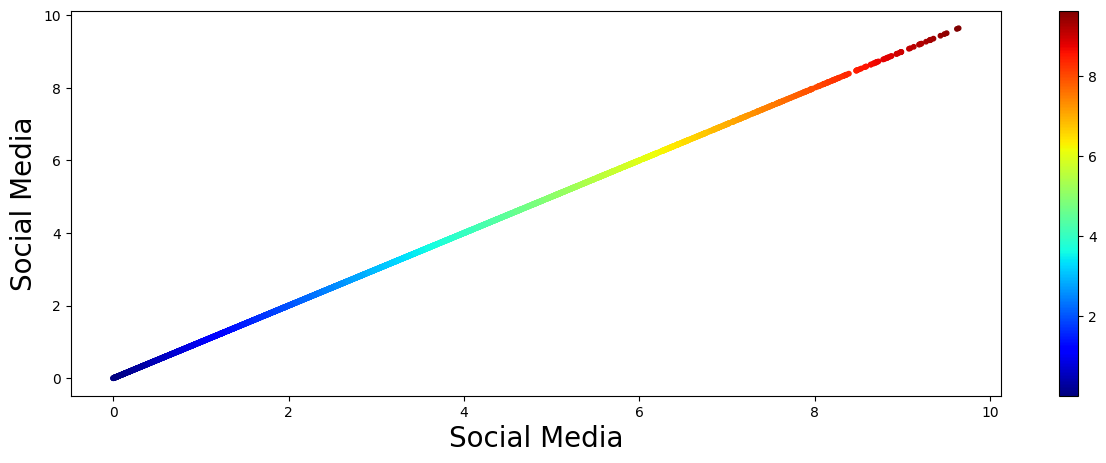

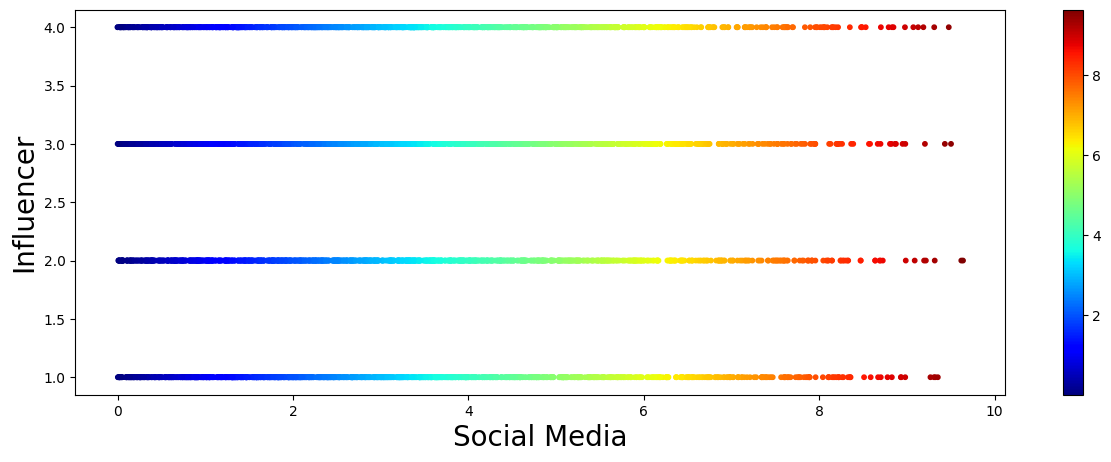

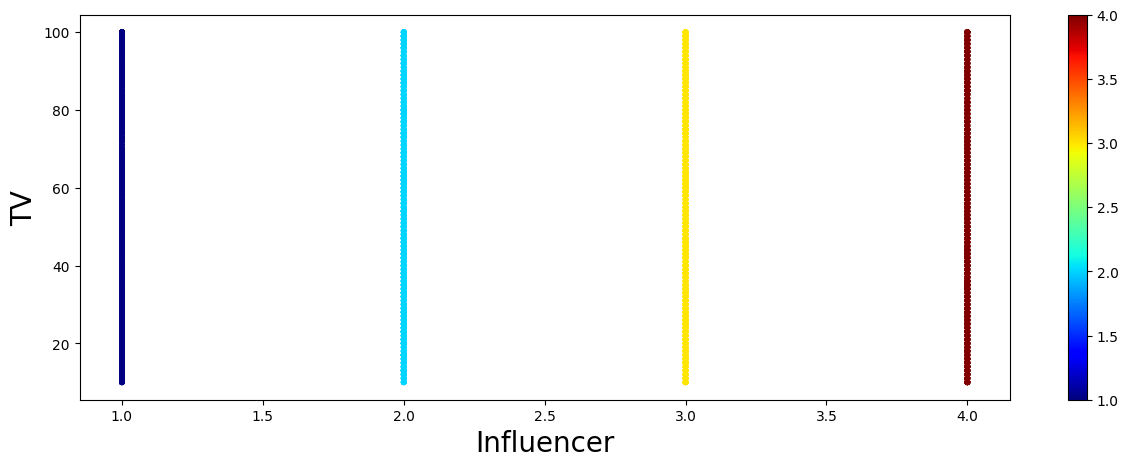

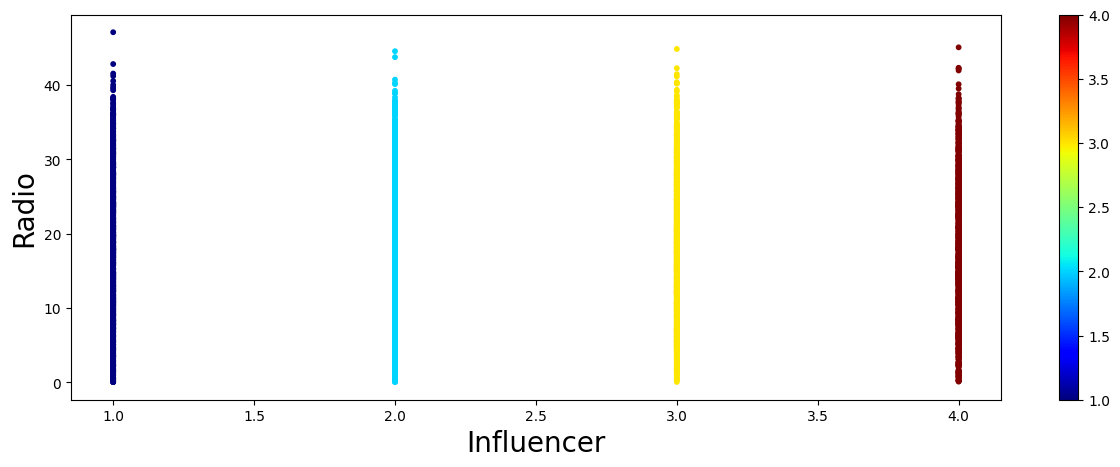

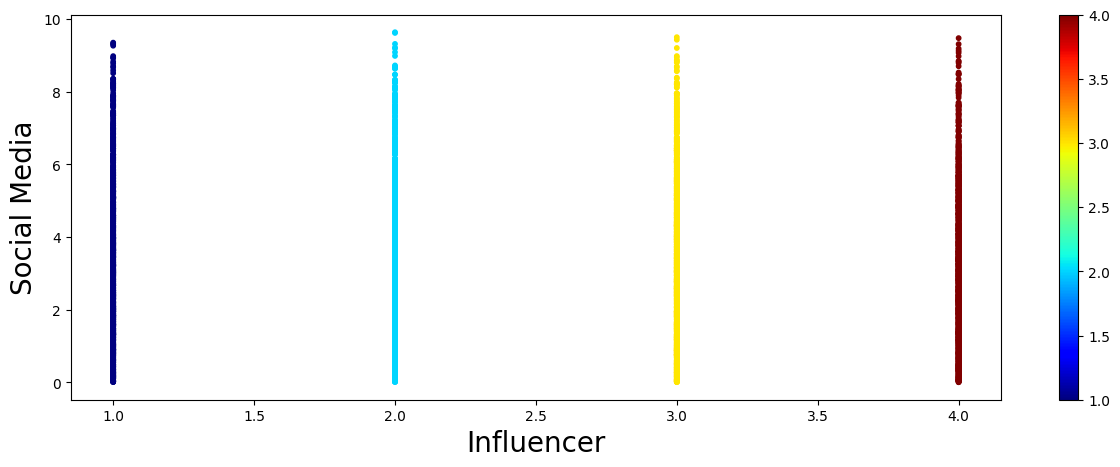

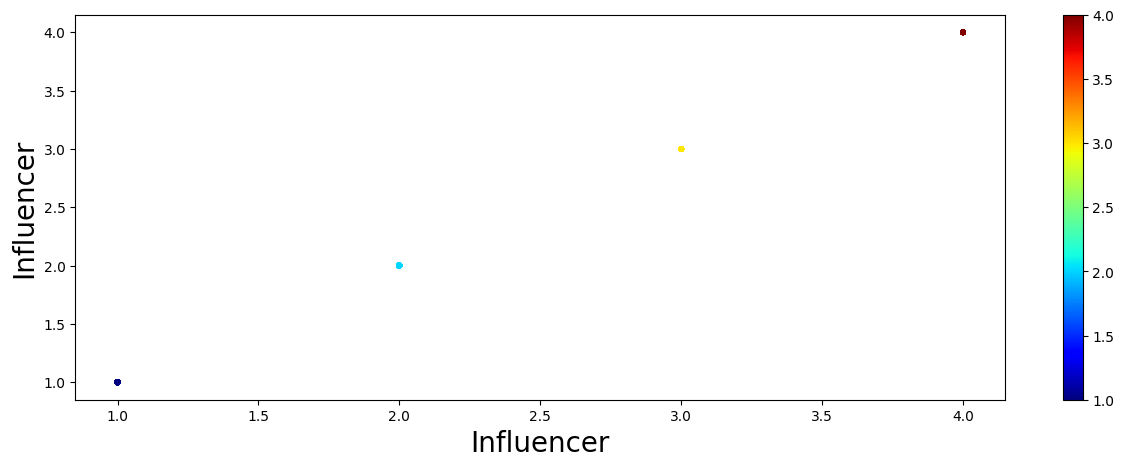

In [78]:
for column_1st in data:
    for coloum_2nd in data:
        jet=plt.get_cmap('jet')
        plt.figure(figsize=(15,5))
        plt.scatter(data[column_1st], data[coloum_2nd], s=10, c=data[column_1st],  cmap=jet)
        plt.xlabel(column_1st,fontsize=20)
        plt.ylabel(coloum_2nd,fontsize=20)
        plt.colorbar()
        plt.show()

In [67]:
y = np.array(data.pop('Sales').values)
x = np.array(data.values)

In [68]:
print(x.shape,y.shape)

(4517, 4) (4517,)


In [69]:
#split data into 80% for training and 20% for testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

Scale Dataset

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

Building Model

In [71]:
# create model
model = Sequential()
     
model.add(Dense(400, input_dim=4, activation='relu'))
      
model.add(Dense(300, input_dim=4, activation='relu'))

model.add(Dense(200, input_dim=4, activation='relu'))    
    
model.add(Dense(1,input_dim=4,activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

Training

In [72]:
# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=40)

Epoch 1/40
57/57 [==============================] - 1s 4ms/step - loss: 5989.0391
Epoch 2/40
57/57 [==============================] - 0s 4ms/step - loss: 29.2530
Epoch 3/40
57/57 [==============================] - 0s 4ms/step - loss: 9.4727
Epoch 4/40
57/57 [==============================] - 0s 4ms/step - loss: 9.5000
Epoch 5/40
57/57 [==============================] - 0s 4ms/step - loss: 9.3666
Epoch 6/40
57/57 [==============================] - 0s 5ms/step - loss: 9.2038
Epoch 7/40
57/57 [==============================] - 0s 5ms/step - loss: 9.1119
Epoch 8/40
57/57 [==============================] - 0s 4ms/step - loss: 9.1739
Epoch 9/40
57/57 [==============================] - 0s 5ms/step - loss: 9.1690
Epoch 10/40
57/57 [==============================] - 0s 7ms/step - loss: 9.4282
Epoch 11/40
57/57 [==============================] - 0s 6ms/step - loss: 9.1935
Epoch 12/40
57/57 [==============================] - 0s 5ms/step - loss: 9.1741
Epoch 13/40
57/57 [==========================

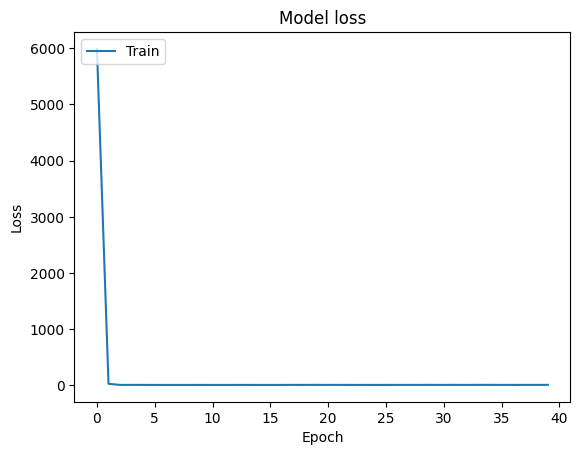

In [73]:
# Plot training & validation loss values
plt.plot(history.history['loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [74]:
loss = model.evaluate(x_test,y_test)
print('Loss : ', loss)

29/29 [==============================] - 0s 2ms/step - loss: 11.0563
Loss :  11.05625057220459


In [75]:
y_pred = model.predict(x_test)

29/29 [==============================] - 0s 2ms/step


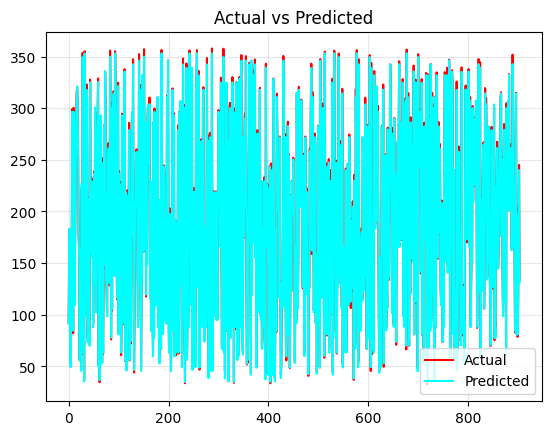

In [76]:
#Visualising the Acutal and predicted Result
plt.plot(y_test, color = 'red', label = 'Actual')
plt.plot(y_pred, color = 'cyan', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [77]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9986719413118266
